In [1]:
import pandas as pd

In [2]:
#load data
df=pd.read_csv('final_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,Review Text,Rating
0,0,Not great speakers,3.0
1,1,Great little gagit,4.0
2,2,Awesome 👏🏽,5.0
3,3,Love my Echo,5.0
4,4,Great device,5.0


In [4]:
#rating class distribution
df['Rating'].value_counts().sort_index()

Rating
1.0     8669
2.0     4283
3.0     7786
4.0    17541
5.0    47857
Name: count, dtype: int64

In [5]:
# Desired sample count
target_count = 4000

# List to hold balanced chunks
balanced_chunks = []

# For each rating from 1.0 to 5.0
for rating in sorted(df['Rating'].unique()):
    subset = df[df['Rating'] == rating]
    
    # If more than target_count, undersample
    if len(subset) >= target_count:
        subset = subset.sample(target_count, random_state=42)
    
    balanced_chunks.append(subset)

# Combine all chunks
balanced_df = pd.concat(balanced_chunks, ignore_index=True)

# Shuffle the result
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new distribution
print(balanced_df['Rating'].value_counts())


Rating
3.0    4000
1.0    4000
4.0    4000
5.0    4000
2.0    4000
Name: count, dtype: int64


In [6]:
balanced_df.head()

,Unnamed: 0,Review Text,Rating
0,10055,Cooling system is good. Looking by colour is g...,3.0
1,8490,Hell phone Word third class and word bed phone...,1.0
2,44350,Initially I was happy to get such a good hardw...,3.0
3,23062,they delivered me defected piece of mobile whi...,1.0
4,349,I'm enjoying my echo dot. This would make a gr...,4.0


In [7]:
balanced_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
balanced_df.head()

,Review Text,Rating
0,Cooling system is good. Looking by colour is g...,3.0
1,Hell phone Word third class and word bed phone...,1.0
2,Initially I was happy to get such a good hardw...,3.0
3,they delivered me defected piece of mobile whi...,1.0
4,I'm enjoying my echo dot. This would make a gr...,4.0


In [9]:
balanced_df.isnull().sum()

Review Text    0
Rating         0
dtype: int64

In [10]:
balanced_df.duplicated().sum()

np.int64(0)

In [11]:
#balanced_df.to_csv('balanced_data_.csv')

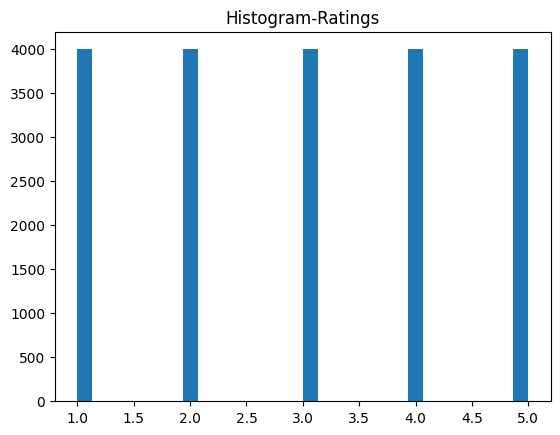

In [12]:
import matplotlib.pyplot as plt
#histogram of rating
plt.hist(balanced_df['Rating'],bins=30)
plt.title('Histogram-Ratings')
plt.show()

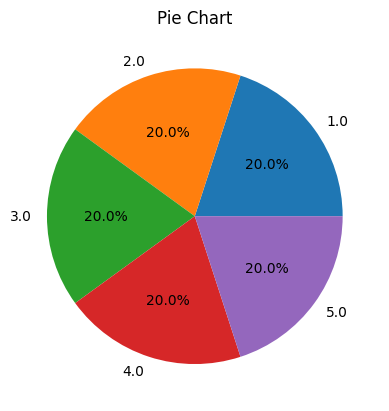

In [13]:
#pie chart
rating_counts = balanced_df['Rating'].value_counts().sort_index()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.title("Pie Chart")
plt.show()

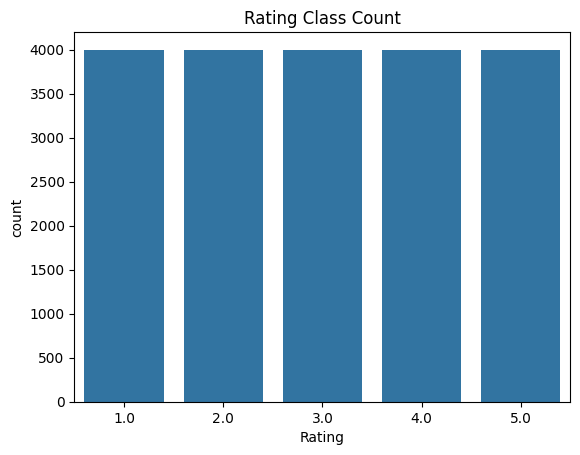

In [14]:
import seaborn as sns
#Count plot (for categorical data)
sns.countplot(x='Rating', data=balanced_df)
plt.title("Rating Class Count")
plt.show()